In [22]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt
import os
pwd = os.getcwd()

fileNames = ["S","T","ST","G","GS","GT","GST","C","CS","CT","CST"]
names = ["Swap","2-Opt","Swap -> 2-Opt","Greedy","Greedy -> Swap","Greedy -> 2-Opt","Greedy -> Swap -> 2-Opt"
         , "Temperate","Temperate -> Swap","Temperate -> 2-Opt","Temperate -> Swap -> 2-Opt"]
colors = ["red","darkorange","gold","forestgreen","lightseagreen","dodgerblue","navy","indigo","deeppink","crimson","grey"]

moves = [[],[],[],[],[],[],[],[],[],[],[]]
for i in range(len(moves)):
    moves[i] = list(map(int,loadtxt(pwd + "/aqmaps"+fileNames[i]+"Moves.txt",dtype="str",delimiter="\n",unpack=False)))

dates = loadtxt(pwd + "/aqmapsDates.txt",dtype="str",delimiter="\n",unpack=False)

In [23]:
ind = int(np.where(dates == "15/06/2021")[0])
print(moves[6][ind])
print(moves[6][0])

98
102


Text(0.5,1,'A graph to show route performance of all algorithms for all unique days')

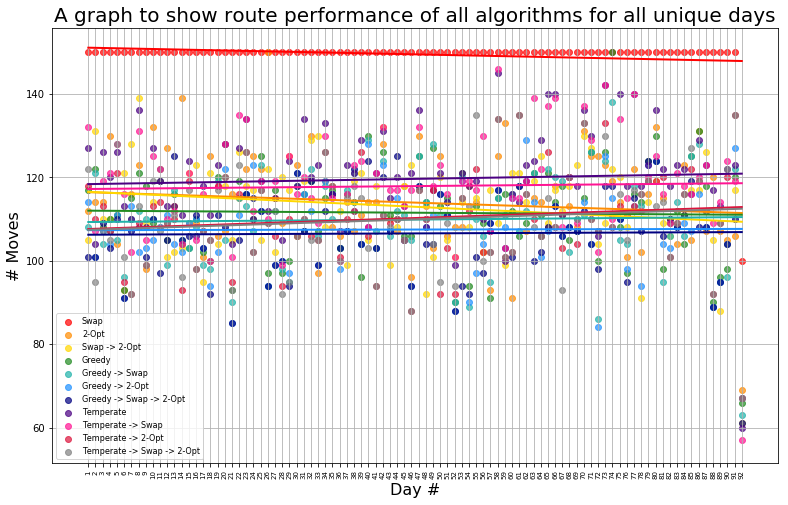

In [3]:
import seaborn as sns
import pandas as pd
x = range(92)

plt.rcParams["figure.figsize"] = (13,8)

for i in range(11):
    plt.scatter(x,moves[i][0:92],c=colors[i],label=names[i],alpha=0.7)
    plt.plot(x, np.poly1d(np.polyfit(x,moves[i][0:92],1))(np.unique(x)),c=colors[i],lw=2)

plt.grid(True)
plt.legend(loc="lower left",fontsize=8)
plt.xlabel("Day #",fontsize=16)
plt.ylabel("# Moves",fontsize=16)
plt.xticks(x,range(1,93),rotation=90,fontsize=7)
plt.title("A graph to show route performance of all algorithms for all unique days",fontsize=20)


Text(0.5,1,'A graph to show route performance of all raw algorithms for all unique days')

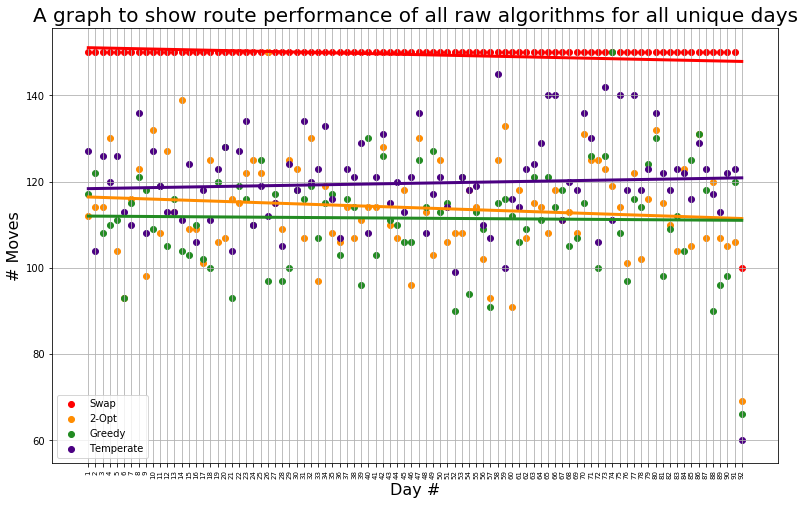

In [9]:
ys=[0,1,3,7]

for y in ys:
    plt.scatter(x,moves[y][0:92],c=colors[y],label=names[y])
    plt.plot(x, np.poly1d(np.polyfit(x,moves[y][0:92],1))(np.unique(x)),c=colors[y],lw=3)

plt.grid(True)
plt.legend(loc="lower left")
plt.xlabel("Day #",fontsize=16)
plt.ylabel("# Moves",fontsize=16)
plt.xticks(x,range(1,93),rotation=90,fontsize=7)
plt.title("A graph to show route performance of all raw algorithms for all unique days",fontsize=20)


Text(0.5,1,'A graph to show the performance of all algorithms for all days in 2020 & 2021')

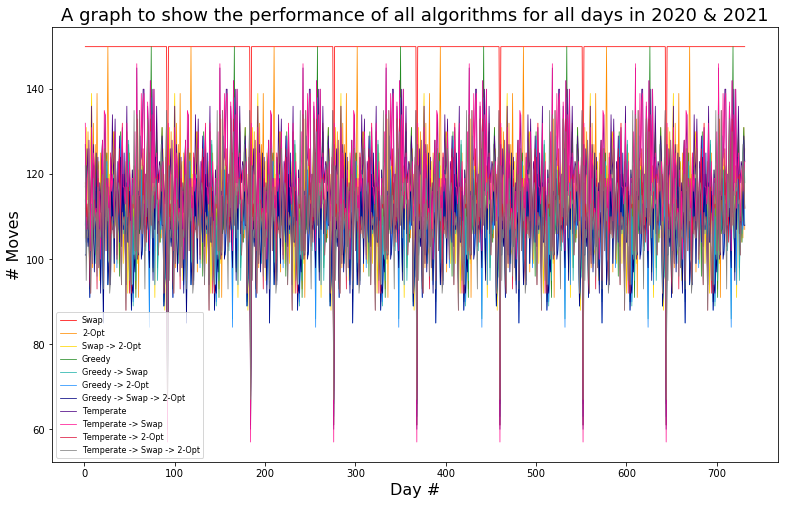

In [10]:
for i in range(11):
    plt.plot(range(1,732),moves[i],c=colors[i],label=names[i],lw=0.75)
    
plt.legend(loc="lower left",fontsize=8)
plt.xlabel("Day #",fontsize=16)
plt.ylabel("# Moves",fontsize=16)
plt.title("A graph to show the performance of all algorithms for all days in 2020 & 2021",fontsize=18)


In [24]:
#Print means, max, and min

for i in range(11):
    print(names[i])
    print(round(np.mean(moves[i]),2))
    print(min(moves[i]))
    print(max(moves[i]))
    print()

Swap
149.52
100
150

2-Opt
112.53
69
135

Swap -> 2-Opt
111.79
61
139

Greedy
111.18
66
150

Greedy -> Swap
110.29
63
142

Greedy -> 2-Opt
107.01
69
131

Greedy -> Swap -> 2-Opt
105.86
61
124

Temperate
118.59
61
142

Temperate -> Swap
115.88
57
140

Temperate -> 2-Opt
109.25
69
135

Temperate -> Swap -> 2-Opt
109.61
69
137



Text(0.5,0,'Mean execution time for 731 maps with 33 sensors (s)')

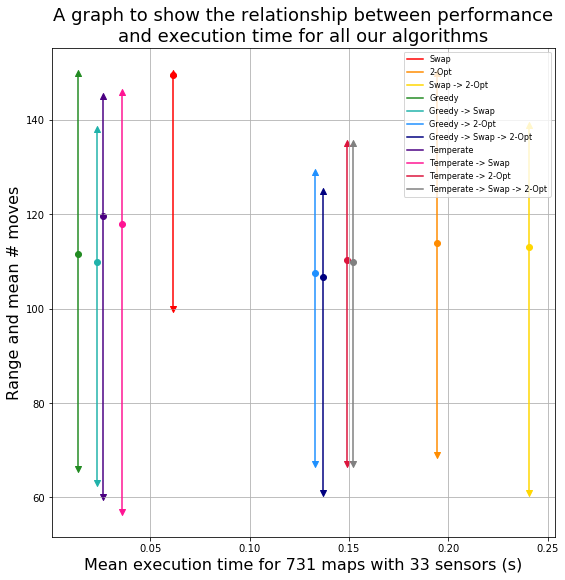

In [12]:
times = [45,142,176,10,17,97,100,19,26,109,111]

plt.rcParams["figure.figsize"] = [9,9]

for i in range(11):
    x = times[i]/731
    plt.scatter(x,np.mean(moves[i]),c=colors[i],marker="o")#,label=names[i])
    plt.scatter(x,np.min(moves[i]),c=colors[i],marker="v")
    plt.scatter(x,np.max(moves[i]),c=colors[i],marker="^")
    plt.plot([x]*2,[np.min(moves[i]),np.max(moves[i])],c=colors[i],label=names[i])
    
plt.legend(loc="upper right",fontsize=8)
plt.grid(True)
plt.title("A graph to show the relationship between performance\nand execution time for all our algorithms",fontsize=18)
plt.ylabel("Range and mean # moves",fontsize=16)
plt.xlabel("Mean execution time for 731 maps with 33 sensors (s)",fontsize=16)